Chapter 22  
# PCA Explained Through Ellipse
*Machine Learning Made Easy and Visual with Python*

## Import required packages

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load data

In [5]:
df = pd.read_csv('IR_data.csv')
df = df.dropna()

In [6]:
# Rename columns for simplicity
df = df.rename(columns={'DGS6MO': 'X1', 
                        'DGS1': 'X2'})
df = df[['X1', 'X2']]
df.head()

,X1,X2
0,0.22,0.40
1,0.22,0.38
2,0.22,0.41
3,0.23,0.45
4,0.24,0.43


## Compute daily returns

In [8]:
X_df = df.pct_change()
X_df = X_df.dropna()

## Standardize data

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_df)

In [11]:
# Check covariance of standardized data
np.cov(X_scaled.T)

array([[1.00404858, 0.74432704],
       [0.74432704, 1.00404858]])

## Compute covariance matrix

In [13]:
from sklearn.covariance import EmpiricalCovariance
x1_array = np.linspace(-6, 6, 601)
x2_array = np.linspace(-6, 6, 601)
xx1, xx2 = np.meshgrid(x1_array, x2_array)
xx12 = np.c_[xx1.ravel(), xx2.ravel()]

In [14]:
# Fit empirical covariance model
COV = EmpiricalCovariance().fit(X_scaled)

## Compute Mahalanobis distance

In [16]:
mahal_sq_Xc = COV.mahalanobis(xx12)
mahal_sq_dd = mahal_sq_Xc.reshape(xx1.shape)
mahal_dd = np.sqrt(mahal_sq_dd)

In [17]:
## Visualize data with Mahalanobis distance contours

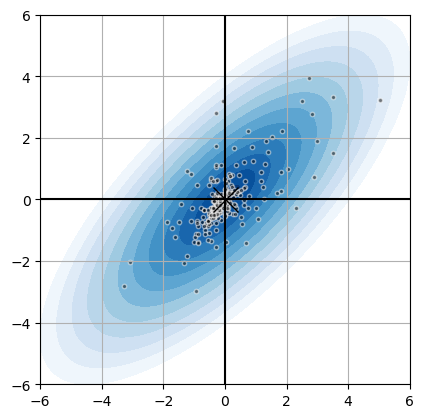

In [18]:
fig, ax = plt.subplots()

plt.contourf(xx1, xx2, mahal_dd, 
             cmap='Blues_r', levels=np.linspace(0, 6, 13))

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], 
            s=38, edgecolor='w', alpha=0.5,
            marker='.', color='k')

# Mark data mean
plt.plot(X_scaled[:, 0].mean(), X_scaled[:, 1].mean(), 
         marker='x',
         color='k', 
         markersize=18)

# Draw axes and configure plot appearance
ax.axvline(x=0, c='k')
ax.axhline(y=0, c='k')
ax.grid('off')
ax.set_aspect('equal', adjustable='box')
ax.set_xbound(lower=-6, upper=6)
ax.set_ybound(lower=-6, upper=6)

## Principal Component Analysis (PCA)

In [20]:
from sklearn.decomposition import PCA

# Perform PCA
n_components = 2  # Number of principal components
pca = PCA(n_components=2)

In [21]:
# Fit PCA model
pca.fit(X_scaled)

PCA(n_components=2)

In [22]:
# Get loadings (principal directions)
loadings = pca.components_.T
V = loadings

In [23]:
print(np.round(loadings.T @ loadings))  # Should be close to identity matrix
v1 = V[:, [0]]  # First principal component direction
v2 = V[:, [1]]  # Second principal component direction

[[ 1. -0.]
 [-0.  1.]]


In [24]:
# Eigenvalues and explained variance ratio
pca.explained_variance_
pca.explained_variance_ratio_

array([0.87066286, 0.12933714])

## Visualize PCA directions on Mahalanobis contour

In [26]:
def draw_vector(vector, RGB): 
    """Helper function to draw vectors starting from origin."""
    array = np.array([[0, 0, vector[0], vector[1]]], dtype=object)
    X, Y, U, V = zip(*array)
    plt.quiver(X, Y, U, V, angles='xy', 
               scale_units='xy', scale=1, color=RGB,
               zorder=1e5)

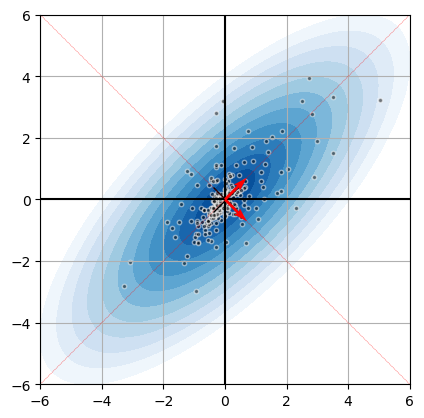

In [27]:
fig, ax = plt.subplots()

plt.contourf(xx1, xx2, mahal_dd, 
             cmap='Blues_r', levels=np.linspace(0, 6, 13))

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], 
            s=38, edgecolor='w', alpha=0.5,
            marker='.', color='k')

plt.plot(X_scaled[:, 0].mean(), X_scaled[:, 1].mean(), 
         marker='x',
         color='k', 
         markersize=18)

# Visualize two PCA component directions
draw_vector(v1, 'r')
draw_vector(v2, 'r')

# Draw dashed reference lines for each component
ax.plot(x1_array, x1_array * v1[1] / v1[0], 'r', 
        lw=0.25, ls='dashed')
ax.plot(x1_array, x1_array * v2[1] / v2[0], 'r', 
        lw=0.25, ls='dashed')

ax.axvline(x=0, c='k')
ax.axhline(y=0, c='k')
ax.grid('off')
ax.set_aspect('equal', adjustable='box')
ax.set_xbound(lower=-6, upper=6)
ax.set_ybound(lower=-6, upper=6)

## Projection onto the first principal component

In [29]:
proj1 = v1 @ v1.T
z1_2D = X_scaled @ proj1

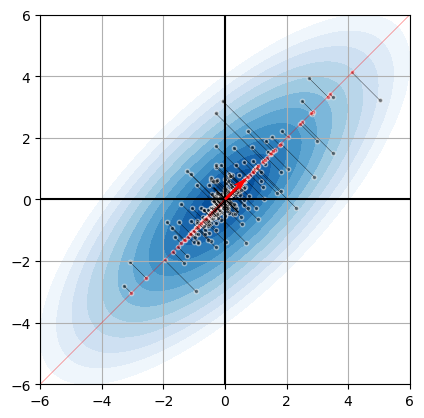

In [30]:
fig, ax = plt.subplots()

plt.contourf(xx1, xx2, mahal_dd, 
             cmap='Blues_r', levels=np.linspace(0, 6, 13))

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], 
            s=38, edgecolor='w', alpha=0.5,
            marker='.', color='k')

plt.plot(X_scaled[:, 0].mean(), X_scaled[:, 1].mean(), 
         marker='x',
         color='k', 
         markersize=18)

# Projected data points (in red)
plt.scatter(z1_2D[:, 0], z1_2D[:, 1], 
            s=38, edgecolor='w', alpha=0.5,
            marker='.', color='r')

# Draw projection lines from original points
plt.plot(([i for (i, j) in z1_2D], [i for (i, j) in X_scaled]),
         ([j for (i, j) in z1_2D], [j for (i, j) in X_scaled]),
         c='k', lw=0.25)

draw_vector(v1, 'r')
ax.plot(x1_array, x1_array * v1[1] / v1[0], 'r', lw=0.25)

ax.axvline(x=0, c='k')
ax.axhline(y=0, c='k')
ax.grid('off')
ax.set_aspect('equal', adjustable='box')
ax.set_xbound(lower=-6, upper=6)
ax.set_ybound(lower=-6, upper=6)

## Projection onto the second principal component

In [32]:
proj2 = v2 @ v2.T
z2_2D = X_scaled @ proj2

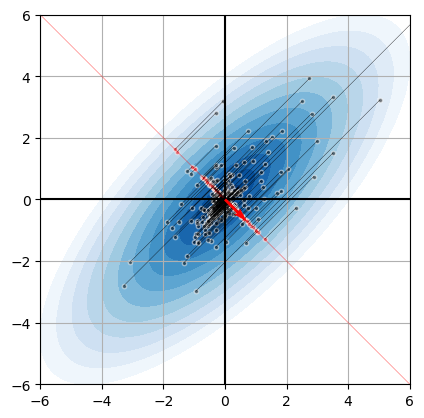

In [33]:
fig, ax = plt.subplots()

plt.contourf(xx1, xx2, mahal_dd, 
             cmap='Blues_r', levels=np.linspace(0, 6, 13))

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], 
            s=38, edgecolor='w', alpha=0.5,
            marker='.', color='k')

plt.plot(X_scaled[:, 0].mean(), X_scaled[:, 1].mean(), 
         marker='x',
         color='k', 
         markersize=18)

# Projected data along the second principal component
plt.scatter(z2_2D[:, 0], z2_2D[:, 1], 
            s=38, edgecolor='w', alpha=0.5,
            marker='.', color='r')

# Draw projection lines
plt.plot(([i for (i, j) in z2_2D], [i for (i, j) in X_scaled]),
         ([j for (i, j) in z2_2D], [j for (i, j) in X_scaled]),
         c='k', lw=0.25)

draw_vector(v2, 'r')
ax.plot(x1_array, x1_array * v2[1] / v2[0], 'r', lw=0.25)

ax.axvline(x=0, c='k')
ax.axhline(y=0, c='k')
ax.grid('off')
ax.set_aspect('equal', adjustable='box')
ax.set_xbound(lower=-6, upper=6)
ax.set_ybound(lower=-6, upper=6)

## Visualize in PCA coordinate system

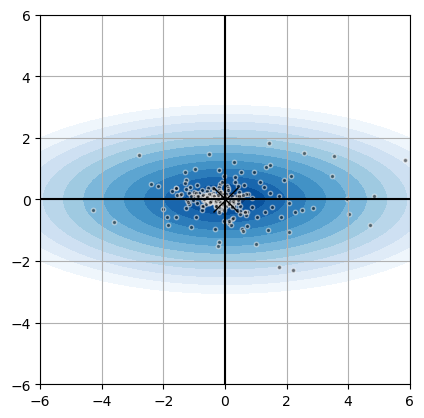

In [35]:
Z = X_scaled @ V
COV = EmpiricalCovariance().fit(Z)

mahal_sq_Xc = COV.mahalanobis(xx12)
mahal_sq_dd = mahal_sq_Xc.reshape(xx1.shape)
mahal_dd = np.sqrt(mahal_sq_dd)

fig, ax = plt.subplots()

plt.contourf(xx1, xx2, mahal_dd, 
             cmap='Blues_r', levels=np.linspace(0, 6, 13))

plt.scatter(Z[:, 0], Z[:, 1], 
            s=38, edgecolor='w', alpha=0.5,
            marker='.', color='k')

plt.plot(X_scaled[:, 0].mean(), X_scaled[:, 1].mean(), 
         marker='x',
         color='k', 
         markersize=18)

ax.axvline(x=0, c='k')
ax.axhline(y=0, c='k')
ax.grid('off')
ax.set_aspect('equal', adjustable='box')
ax.set_xbound(lower=-6, upper=6)
ax.set_ybound(lower=-6, upper=6)